In [192]:
#importing data manupulation libraries
import pandas as pd
import numpy as np
#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#importing warning
import warnings
warnings.filterwarnings("ignore")
#importing logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',force=True,
                    filemode='w',
                    format='%(asctime)s %(levelname)s %(message)s')
#importing scikit learn libraries   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix                 

In [193]:
url='https://raw.githubusercontent.com/harshthorve284/Aus-Whether-Forecasting-/refs/heads/main/weatherAUS.csv'
df=pd.read_csv(url)
df.sample(frac=1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
58438,2009-09-23,Bendigo,9.7,17.0,0.0,1.2,NaN,WSW,65.0,SW,WSW,30.0,26.0,71.0,53.0,1002.9,1006.3,7.0,7.0,11.6,15.4,No,No
136711,2010-09-02,AliceSprings,13.0,27.5,0.0,7.4,4.6,NW,61.0,NNW,N,33.0,28.0,73.0,54.0,1014.2,1011.0,7.0,7.0,22.8,26.5,No,Yes
91285,2011-11-11,GoldCoast,20.9,27.1,0.0,NaN,NaN,SE,46.0,SE,SE,11.0,33.0,76.0,77.0,1020.3,1018.7,NaN,NaN,24.8,24.1,No,No
79552,2013-07-11,Watsonia,1.1,15.3,0.2,2.2,3.3,NE,19.0,NE,N,6.0,6.0,99.0,59.0,1034.1,1030.5,8.0,7.0,3.1,14.8,No,No
137234,2012-03-08,AliceSprings,10.4,29.4,0.0,8.2,11.4,ESE,37.0,ESE,ESE,15.0,26.0,46.0,24.0,1012.5,1008.4,0.0,0.0,20.0,28.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25057,2011-07-19,Penrith,2.9,15.4,0.2,NaN,NaN,WSW,50.0,NaN,WSW,0.0,6.0,97.0,75.0,NaN,NaN,NaN,NaN,6.8,10.8,No,Yes
84740,2010-07-04,Brisbane,6.7,21.3,0.0,5.0,9.6,SW,19.0,SW,SE,6.0,7.0,59.0,46.0,1027.6,1023.6,1.0,2.0,12.4,20.3,No,No
63167,2014-09-06,Sale,2.0,16.6,0.2,NaN,NaN,E,26.0,WSW,E,9.0,17.0,97.0,54.0,1031.5,1028.9,2.0,0.0,6.2,16.2,No,No
95999,2016-08-09,Townsville,14.0,26.1,0.0,8.0,NaN,ENE,37.0,SE,ENE,15.0,30.0,60.0,53.0,1021.3,1017.6,NaN,NaN,21.9,24.4,No,No


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [195]:
#checking null values per column
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [196]:
#Calculate % of missing values per column
null_percent=(df.isnull().sum()/len(df))*100

#Droping the columns with more than 15%  missing value
col_to_drop = null_percent[null_percent> 15].index

#Drop those columns from the dataframe
df_cleaned = df.drop(columns=col_to_drop)

print(f"Dropped columns (null>15%):",col_to_drop.tolist())
print(f"Remaining columns:",df_cleaned.columns.tolist())

Dropped columns (null>15%): ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
Remaining columns: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [197]:
# converting the datecolumn
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns=['Date'],inplace=True)

In [198]:
#Creating the year month date column
df['YMD'] = df['Year'] * 10000 + df['Month'] * 100 + df['Day']

In [199]:
#droping the extra columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

In [200]:
#draging the target column at the end of the Dataframe
target_col = 'RainTomorrow'
cols = [col for col in df.columns 
        if col != target_col] + [target_col]
df = df[cols]


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [202]:
categorical_col=df.select_dtypes(include='object')
numerical_col=df.select_dtypes(exclude='object')

In [203]:
#Discriptive stats
from collections import OrderedDict
stats=[]

for i in numerical_col.columns:
    numerical_stats=OrderedDict({
    'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)
report    

,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance
0,MinTemp,1.219403e+01,12.0,11.0,7.6,16.9,9.3,6.398495,0.021188,-0.483972,33.9,-8.5,4.094074e+01
1,MaxTemp,2.322135e+01,22.6,20.0,17.9,28.2,10.3,7.119049,0.220839,-0.224630,48.1,-4.8,5.068086e+01
2,Rainfall,2.360918e+00,0.0,0.0,0.0,0.8,0.8,8.478060,9.836225,178.152079,371.0,0.0,7.187750e+01
3,Evaporation,5.468232e+00,4.8,4.0,2.6,7.4,4.8,4.193704,3.761286,45.043266,145.0,0.0,1.758715e+01
4,Sunshine,7.611178e+00,8.4,0.0,4.8,10.6,5.8,3.785483,-0.496480,-0.829459,14.5,0.0,1.432988e+01
5,WindGustSpeed,4.003523e+01,39.0,35.0,31.0,48.0,17.0,13.607062,0.874879,1.418642,135.0,6.0,1.851521e+02
6,WindSpeed9am,1.404343e+01,13.0,9.0,7.0,19.0,12.0,8.915375,0.777630,1.226991,130.0,0.0,7.948392e+01
7,WindSpeed3pm,1.866266e+01,19.0,13.0,13.0,24.0,11.0,8.809800,0.628215,0.763858,87.0,0.0,7.761258e+01
8,Humidity9am,6.888083e+01,70.0,99.0,57.0,83.0,26.0,19.029164,-0.483969,-0.037555,100.0,0.0,3.621091e+02
9,Humidity3pm,5.153912e+01,52.0,52.0,37.0,66.0,29.0,20.795902,0.033614,-0.511363,100.0,0.0,4.324695e+02


In [204]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [205]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [207]:

from sklearn.preprocessing import LabelEncoder

for i in categorical_col:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

<Axes: >

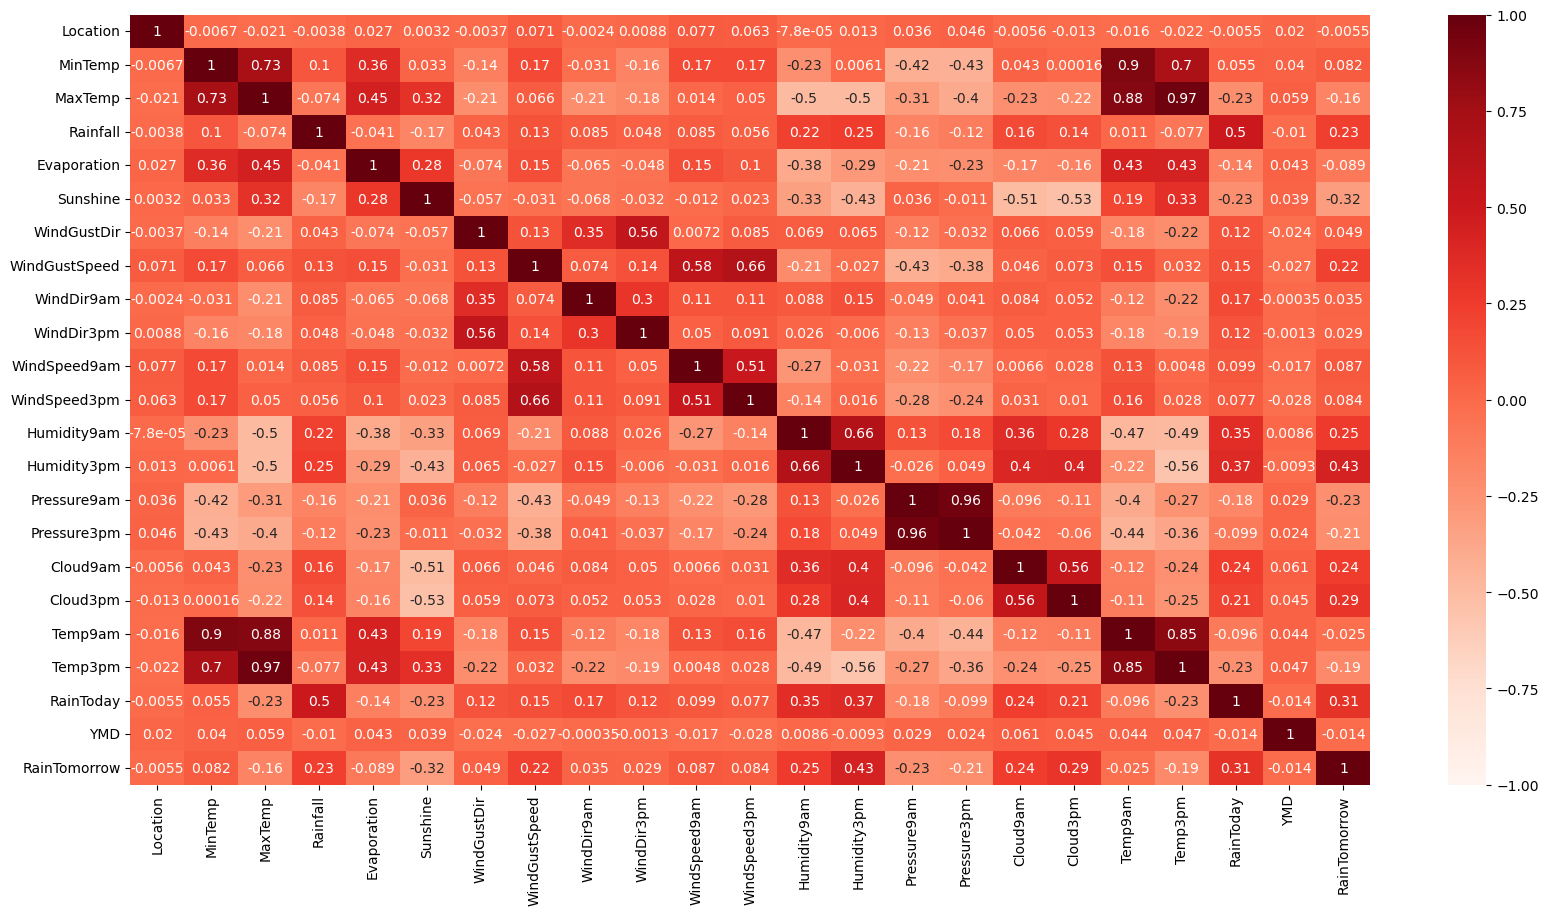

In [208]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot= True, vmax=1,vmin=-1,center=0,cmap='Reds')

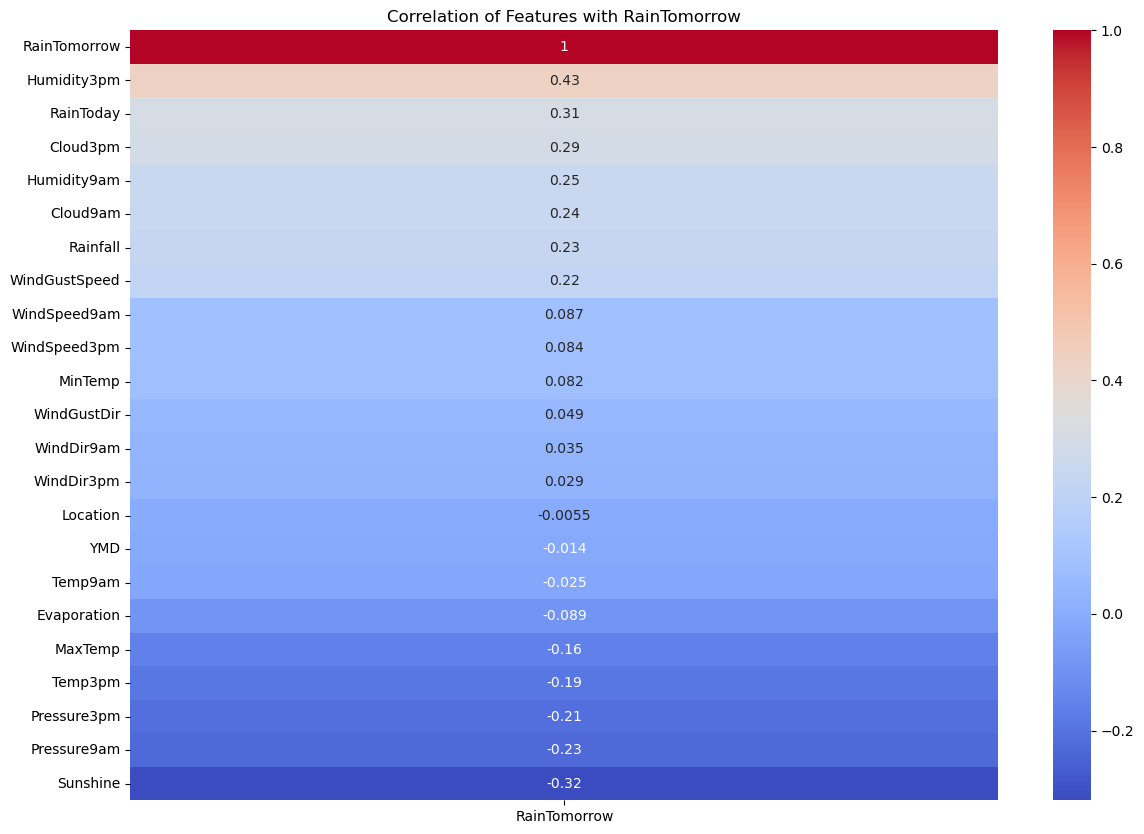

In [209]:
# Calculate correlation 
corr_matrix = df.corr(numeric_only=True)


# Sort correlation of all features with the target column
target = 'RainTomorrow'
sorted_corr = corr_matrix[target].sort_values(ascending=False)

# Plot the top correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with RainTomorrow")
plt.show()

In [212]:
X=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [215]:
from imblearn.over_sampling import SMOTE,SMOTEN,ADASYN
os=SMOTE(random_state=42)
X_train,y_train=os.fit_resample(X_train,y_train)
y_train.value_counts()


RainTomorrow
0    79596
1    79596
Name: count, dtype: int64

In [216]:
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [217]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(X_train,y_train)
y_pred_RF=RF.predict(X_test)
print('The model accuracy for this model:',accuracy_score(y_test,y_pred_RF))


The model accuracy for this model: 0.8480911132499198


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_DT=DT.predict(X_test)
print('The model accuracy for this model:',accuracy_score(y_test,y_pred_DT))


The model accuracy for this model: 0.7776479215362757


In [ ]:
from xgboost import XGBClassifier
XG=XGBClassifier().fit(X_train,y_train)
y_pred_XG=XG.predict(X_test)
print('The model accuracy for this model:',accuracy_score(y_test,y_pred_XG))

The model accuracy for this model: 0.8577615839406022


In [220]:
Features=XG.feature_importances_

In [221]:
feature_names = X.columns
importance_df=pd.Series(Features,index=feature_names)
importance_df

Location         0.012997
MinTemp          0.006964
MaxTemp          0.008674
Rainfall         0.099504
Evaporation      0.010697
Sunshine         0.068747
WindGustDir      0.012033
WindGustSpeed    0.054756
WindDir9am       0.011786
WindDir3pm       0.013515
WindSpeed9am     0.039428
WindSpeed3pm     0.026563
Humidity9am      0.009719
Humidity3pm      0.171330
Pressure9am      0.006371
Pressure3pm      0.033757
Cloud9am         0.117879
Cloud3pm         0.139596
Temp9am          0.006863
Temp3pm          0.007750
RainToday        0.135543
YMD              0.005528
dtype: float32